<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-Equipo91/blob/main/Reto_Entrega2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

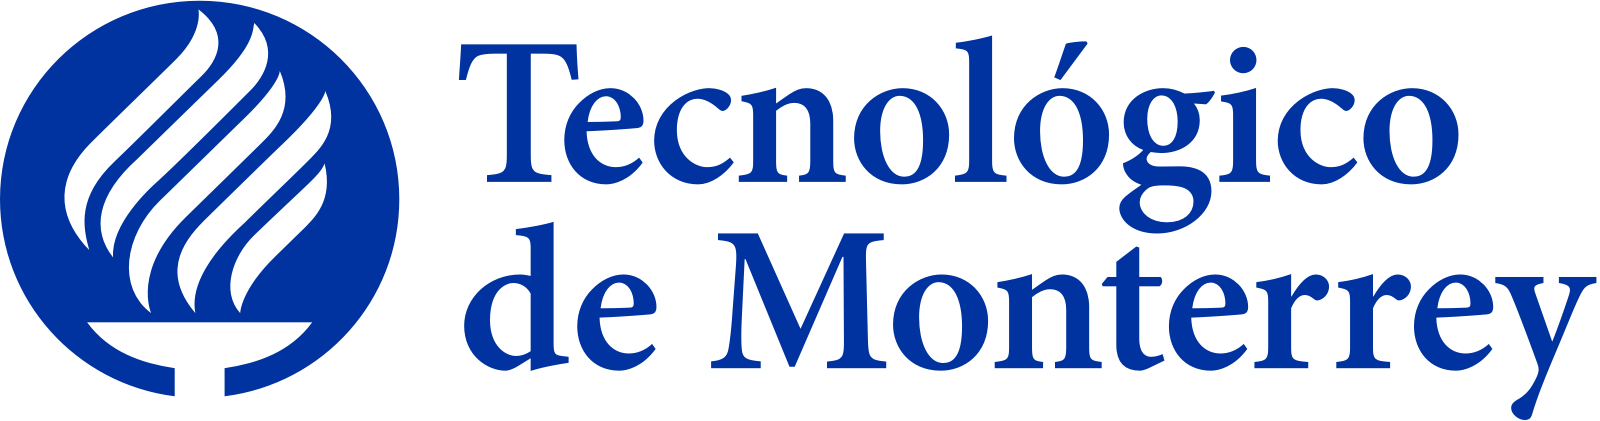


Actividad: Reto 1

Nombre: Andrea Vazquez Tadeo (A01730613 ) y Jose David Hernandez Navarro (A01793021)

Materia: Ciencia y analitica de datos

Profesor: Maria de la Paz Rico Fernandez

Fecha: 16 de noviembre de 2022

#Introducción

Con respecto al agua subterránea, México tiene definidos 653 acuíferos y el 38.7% del agua utilizada en el país proviene de estas fuentes.

Las aguas subterráneas son todas las aguas de lluvia que caen sobre una tierra que puede ser penetrada por algún líquido, que luego descienden lentamente, bajo la acción de la gravedad, hasta encontrar un terreno o asiento impermeable. La acumulación de este recurso conforma una capa de agua debajo de la superficie del terreno.

Esta agua fluye en forma permanente en el subsuelo y eventualmente sale a la superficie de manera natural a través de manantiales, áreas de humedales, cauces fluviales o de forma directa hacia el mar. De igual forma, también puede dirigirse artificialmente a pozos, galerías y a otros tipos de captaciones de agua. 

Una de sus características es que esta agua se renueva constantemente en forma natural, debido a un proceso llamado “recarga”. Esta recarga procede de la infiltración de la lluvia, pero también puede producirse a partir de la infiltración de  otros cuerpos de agua superficial, de estratos del subsuelo cercanos o de excedentes de agua en ciertos usos, por ejemplo, del riego en zonas agrícolas.

El agua subterránea existe en los llamados “acuíferos”. que son formaciones geológicas hidráulicamente conectadas entre sí, por las que circula o se almacenan las aguas subterráneas, que luego pueden ser extraídas para su utilización.

En los acuíferos el agua se renueva muy lentamente en comparación con la de los cuerpos de agua superficial, tales como ríos y lagos. El periodo necesario para renovar por completo un depósito es muy largo. Sin embargo, otros no son renovables porque están a gran profundidad y, si se explotan sin control, pueden agotarse definitivamente.

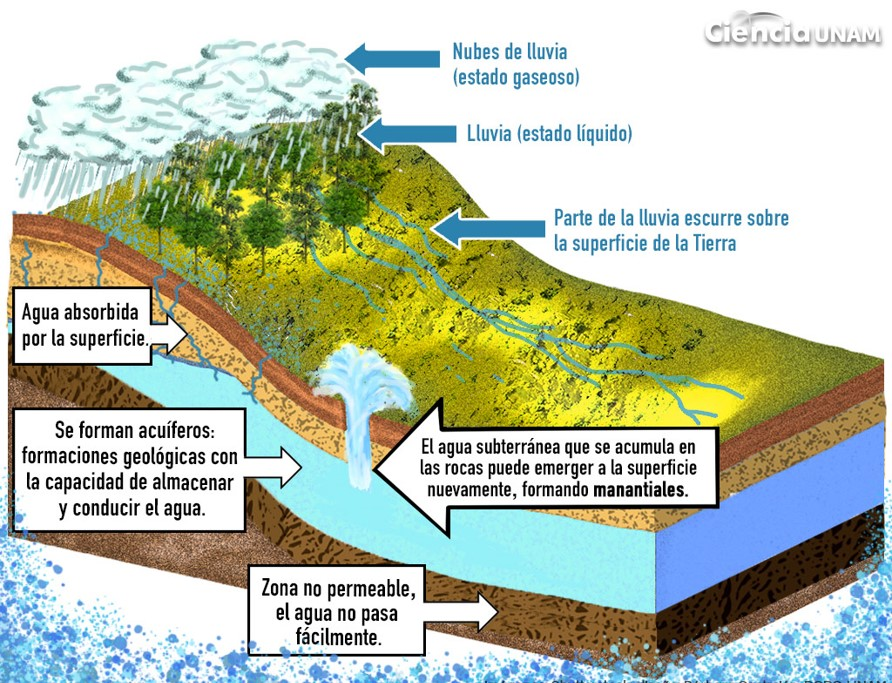

Figura 1 (Formación de aguas subterráneas)

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd

from shapely.geometry import Point

%matplotlib inline

import qeds
qeds.themes.mpl_style();

import requests, zipfile
from io import BytesIO

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, StandardScaler

ModuleNotFoundError: ignored

In [ ]:
#Instalamos libreria para trabajar con mapas
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

#Limpieza, análisis, visualización y agrupamiento

In [ ]:
sub = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'
req = requests.get(sub)
zipfile.ZipFile(BytesIO(req.content)).extractall('unzipped_zip/')

df=pd.read_csv('unzipped_zip/Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv', encoding = 'latin1')
df


In [ ]:
print(df["SEMAFORO"].value_counts())

In [ ]:
#Visualizamos las variables por calidad del agua y ubicación geografica 
sem_map = pd.DataFrame(df['SEMAFORO'])
sem_map


In [ ]:
#Analizamos los datos para validar como se van a limpiar
df_subte = df.copy()
df_subte.describe().T

In [ ]:
df_subte.columns

In [ ]:
df_subte.shape

In [ ]:
df_subte.info()
#El tipo "0" nos indica un texto presente en el dataframe

In [ ]:
df_subte = pd.DataFrame(df_subte)
df_subte['SEMAFORO'] = df_subte['SEMAFORO'].astype('category')
df_subte.info()

In [ ]:
#Ordenamos de forma descedente 
df_subte.isna().sum().sort_values(ascending=False)

In [ ]:
categoricas_sub = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',	'ACUIFERO',	'SUBTIPO',	'CALIDAD_ALC', 'CALIDAD_CONDUC',	'SDT_mg/L',	'CALIDAD_SDT_ra',	'CALIDAD_SDT_salin',	'CALIDAD_FLUO',	'CALIDAD_DUR',	'CALIDAD_COLI_FEC',	'CALIDAD_N_NO3',	'CALIDAD_AS',	'CALIDAD_CD',	'CALIDAD_CR',
                  'CALIDAD_HG',	'CALIDAD_PB',	'CALIDAD_MN',	'CALIDAD_FE',	'CONTAMINANTES',	'CUMPLE_CON_ALC',	'CUMPLE_CON_COND',	'CUMPLE_CON_SDT_ra',	'CUMPLE_CON_SDT_salin',	'CUMPLE_CON_FLUO',	'CUMPLE_CON_DUR',	'CUMPLE_CON_CF',	'CUMPLE_CON_NO3',	'CUMPLE_CON_AS',
                  'CUMPLE_CON_CD',	'CUMPLE_CON_CR',	'CUMPLE_CON_HG',	'CUMPLE_CON_PB',	'CUMPLE_CON_MN',	'CUMPLE_CON_FE', 'CONDUCT_mS/cm',]

In [ ]:
numericas = ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']

In [ ]:
df_sub = df_subte[['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']]
df_sub

In [ ]:
df_sub.columns

In [ ]:
df_sub.max()

##Limpieza

In [ ]:
df_sub

In [ ]:
enc_sem = OrdinalEncoder()
df_sub[['SEMAFORO']] = enc_sem.fit_transform(df_sub[['SEMAFORO']])
df_sub

In [ ]:
for i in numericas:
  print(" nombre de la columna -------------------------" + i)

In [ ]:
#Revisando los valores de cada columna
print(df_sub['FLUORUROS_mg/L'].unique())
print(df_sub['FLUORUROS_mg/L'].value_counts())

In [ ]:
print(" sumatoria por valores uncos--------------------") 
print(df_sub[i].value_counts())

In [ ]:
semaforo = df_sub['SEMAFORO']
semaforo
semaforo.hist(bins = 5, figsize=(12, 5))

In [ ]:
numericas = ['LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L', 'CR_TOT_mg/L',
       'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L', 'FE_TOT_mg/L', 'SEMAFORO']
       
#Convertimos los datos de tipo objeto a flotante, reemplazando valores de manera manual 
for name in numericas:

  df_sub[name] = df_sub[name].astype('str') 
  df_sub[name] = df_sub[name].str.replace('<25','25') 
  df_sub[name] = df_sub[name].str.replace('<0.2','0.2') 
  df_sub[name] = df_sub[name].str.replace('<20','20') 
  df_sub[name] = df_sub[name].str.replace('<1.1','1.1')
  df_sub[name] = df_sub[name].str.replace('<0.02','0.02') 
  df_sub[name] = df_sub[name].str.replace('<0.01','0.01') 
  df_sub[name] = df_sub[name].str.replace('<0.003','0.003')
  df_sub[name] = df_sub[name].str.replace('<0.005','0.005') 
  df_sub[name] = df_sub[name].str.replace('<0.0005','0.0005') 
  df_sub[name] = df_sub[name].str.replace('<0.0015','0.0015') 
  df_sub[name] = df_sub[name].str.replace('<0.025','0.025')
  df_sub[name]= df_sub[name].astype('float')


In [ ]:
  df_sub.info()

In [ ]:
datos_sc = preprocessing.StandardScaler().fit_transform(df_sub)
datos_sc

In [ ]:
datos_minmax = preprocessing.MinMaxScaler().fit_transform(df_sub)
datos_minmax

In [ ]:
df_sub.info()

In [ ]:
for i in numericas:
  print(" nombre de la columna -------------------------" + i)
  
  #print("Valores unicos", df[i].unique())
  print(" sumatoria por valores uncos--------------------") 
  print(df_sub[i].value_counts())

##Análisis

A través de las funciones describe(), mean() se debe identificar tendencias centrales promedio, media y mediana de los datos. Así como medidas de dispersión, máximo, mínimo.

In [ ]:
df_sub

##Visualización

In [ ]:
df_sub.describe().T

##Identificar correlaciones

In [ ]:
df_sub.corr()
#Visualizamos la matriz de correlación

In [16]:
correlacion = df_sub.corr().abs() 

f, ax = plt.subplots(figsize = (15,15)) 

sns.heatmap(correlacion, vmax = 1, vmin = -1, square = True, annot = True)

NameError: ignored

#Partición del DataSet

In [17]:
random_state_v=3

In [18]:
df_sub

NameError: ignored

Selecciona tus variables independientes **X** y dependiente **Y** (**SEMÁFORO**)

In [19]:
X = df_sub.iloc[0:, 0:15]
y = df_sub.iloc[:, -1]

NameError: ignored

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state=random_state_v)
X_train.head()

NameError: ignored

In [21]:
X_train.shape

NameError: ignored

In [22]:
y_train.shape

NameError: ignored

In [23]:
X_train.describe().transpose()

NameError: ignored

Imputación de la variable numérica

In [ ]:
pipeline_cuantitativa = Pipeline(steps = [('impMean', SimpleImputer(strategy='median'))])
cuantitativa_transformada =  ColumnTransformer(transformers = [('cuantitativa', pipeline_cuantitativa, numericas)])

In [ ]:
imputacion_transformer = ColumnTransformer(transformers = [
    ('cuantitativa', pipeline_cuantitativa, numericas)
    ],remainder='passthrough')

In [24]:
total_cuantitativas = len(numericas)
sns.set(rc={'figure.figsize':(17,25)})
fig, axes = plt.subplots(4, total_cuantitativas)    

for i in range(0,total_cuantitativas):


  # Datos originales ---------------------------------------------------------
  plt.subplot(6,5,i+1) 
  Transf0 = X_train[numericas[i]]
  plt.hist(Transf0,bins=20)
  plt.xlabel(numericas[i])
  if i==0:
    plt.ylabel('Originales')


  # Datos transformados con MinMax ---------------------------------
  plt.subplot(6,5,i+16)
  minmax = MinMaxScaler()
  minmax.fit(X_train[numericas[i]].to_numpy().reshape(-1, 1))
  tranf_2 = minmax.transform(X_train[numericas[i]].to_numpy().reshape(-1, 1))
  plt.hist(tranf_2,bins=20) 
  plt.xlabel(numericas[i])
  if i==0:
    plt.ylabel('MinMax')

NameError: ignored

In [25]:
pipeline_logaritmico = Pipeline(steps =[('log', FunctionTransformer(np.log))])

NameError: ignored

Realiza un análisis general de las **features importances** a traves de **decision trees** o **random forest.**

##Datos del mapa

In [ ]:
df_site = df_subte[['LONGITUD','LATITUD']]
df_site

In [ ]:
#Imprimimos la variable de salida semáforo para definir la calidad del agua
print(df_sub[i].value_counts())
semaforo

##Ubicación

In [ ]:
#Visualizamos las coordenadas del dataframe en el mapa 
df_site.plot.scatter('LONGITUD','LATITUD')

In [ ]:
#Crear columnas de coordenadas

df_site
df_site["COORDENADAS"] = list(zip(df_site.LONGITUD, df_site.LATITUD))
df_site["COORDENADAS"] = df_site["COORDENADAS"].apply(Point)
df_site.head()

##Visualización

In [ ]:
#Creación de puntos del mapa

puntos_coordsub = gpd.GeoDataFrame(df_site, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black', cmap='Blues_r')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_coordsub .plot(ax=gax, color='red', alpha = 0.5)
puntos_coordsub

In [ ]:
from sklearn.cluster import KMeans

#Creación de cluster
cluster_sub = range(1, 5) 
mi_kmeans = [KMeans(n_clusters=i) for i in cluster_sub]
Y_axis = df_site[['LATITUD']]
X_axis = df_site[['LONGITUD']]
calculo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

# Visualize

plt.figure(figsize=(12,8))
plt.plot(cluster_sub, calculo_kmeans, color="purple", linestyle="-.", marker="*")
plt.xlabel('Número de Clúster')
plt.ylabel('Score')
plt.title('Curva-codo')

plt.show()

In [ ]:
#Elección de cluster según código del codo

Labels_X = df_subte[['LONGITUD', 'LATITUD']]

#Número de clúster
kmeans_mx = KMeans(n_clusters=10).fit(Labels_X)
centroids = kmeans_mx.cluster_centers_ #se sacan los centroides
labels = kmeans_mx.predict(Labels_X) #labels

# Obtener los centros del clúster
Centroides = kmeans_mx.cluster_centers_ #Valores de centroides

C_MX = pd.DataFrame(Centroides) #convertirlo en DataFrame
C_MX["Coordinates"] = list(zip(C_MX[0], C_MX[1])) #lo convierte en lista 
C_MX["Coordinates"] = C_MX["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

point_center = gpd.GeoDataFrame(C_MX, geometry="Coordinates")
point_center

In [ ]:
df_subte['SEMAFORO'].value_counts()

In [ ]:
print(sem_map.head())
print(df_site.head())

In [ ]:
sem_map['SEMAPHORE'] = sem_map['SEMAFORO'].replace(to_replace = "Verde", value = "green")
sem_map['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
sem_map['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
sem_map

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.

puntos_coordsub.plot(ax=gax, color='purple', alpha = 0.5)
point_center.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuíferos en México')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

##Distancia entre los pozos 

In [ ]:
df_site['kmeans_MX'] = kmeans_mx.labels_ 
df_site.loc[:, 'kmeans_MX'].value_counts()

In [ ]:
point_center

In [ ]:
from pandas.core.internals.concat import concat_arrays

#Coordenadas de las ciudades
#Coordenada x = columna 1, y = columna 0 --- 

Loc_1 = str(point_center[1][0]) + ", " + str(point_center[0][0]) 
print(Loc_1)
Loc_2 = str(point_center[1][1]) + ", " + str(point_center[0][1])
print(Loc_2)
Loc_3 =  str(point_center[1][2]) + ", " + str(point_center[0][2])
print(Loc_3)
Loc_4 =  str(point_center[1][3]) + ", " + str(point_center[0][3])
print(Loc_4)
Loc_5 =  str(point_center[1][4]) + ", " + str(point_center[0][4])
print(Loc_5)
Loc_6 =  str(point_center[1][5]) + ", " + str(point_center[0][5])
print(Loc_6)
Loc_7 =  str(point_center[1][6]) + ", " + str(point_center[0][6])
print(Loc_7)
Loc_8 =  str(point_center[1][7]) + ", " + str(point_center[0][7])
print(Loc_8)
Loc_9 =  str(point_center[1][8]) + ", " + str(point_center[0][8])
print(Loc_9)
Loc_10 =  str(point_center[1][8]) + ", " + str(point_center[0][9])
print(Loc_10)

In [ ]:
print(Loc_1)

#Ciudades

In [ ]:
import geopy.geocoders
from geopy.geocoders.yandex import Location
from functools import partial
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from geopy.location import Location

geolocator = Nominatim(user_agent="my-application") 
Localizaciones = [Loc_1, Loc_2, Loc_3, Loc_4, Loc_5, Loc_6, Loc_7, Loc_8, Loc_9, Loc_10]

for i in Localizaciones:
  
  Location = geolocator.reverse(i)
  print('local en ---', Location)

In [ ]:
Dist_1 = str(geodesic(Loc_1, Loc_2).miles)
print("\nDistancia entre el primer y segundo almacén : ", Dist_1, " ft2 \n") 
Dist_2 = str(geodesic(Loc_2, Loc_3).miles)
print("Distancia entre el segundo y tercer local : ", Dist_2, " ml \n")
Dist_3 = str(geodesic(Loc_3, Loc_4).miles)
print("Distancia entre el segundo y tercer local : ", Dist_3, " ml \n")
Dist_4 = str(geodesic(Loc_4, Loc_5).miles)
print("Distancia entre el segundo y tercer local : ", Dist_4, " ml \n")
Dist_5 = str(geodesic(Loc_5, Loc_6).miles)
print("Distancia entre el segundo y tercer local : ", Dist_5, " ml \n")
Dist_6 = str(geodesic(Loc_6, Loc_7).miles)
print("Distancia entre el segundo y tercer local : ", Dist_6, " ml \n")
Dist_7 = str(geodesic(Loc_6, Loc_7).miles)
print("Distancia entre el segundo y tercer local : ", Dist_7, " ml \n")
Dist_8 = str(geodesic(Loc_7, Loc_8).miles)
print("Distancia entre el segundo y tercer local : ", Dist_8, " ml \n")
Dist_9 = str(geodesic(Loc_8, Loc_9).miles)
print("Distancia entre el segundo y tercer local : ", Dist_9, " ml \n")
Dist_10 = str(geodesic(Loc_9, Loc_10).miles)
print("Distancia entre el segundo y tercer local : ", Dist_10, " ml \n")

#Resultados


Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [ ]:
moda = df_subte["SEMAFORO"].mode()
moda

In [ ]:
df_subte['CALIDAD_ALC'].value_counts()

In [ ]:
moda = df_subte["CALIDAD_ALC"].mode()
moda

In [ ]:
df_subte['CALIDAD_DUR'].value_counts()

In [ ]:
moda = df_subte["CALIDAD_DUR"].mode()
moda

In [ ]:
df_subte['CALIDAD_COLI_FEC'].value_counts()

In [ ]:
moda = df_subte["CALIDAD_COLI_FEC"].mode()
moda

In [ ]:
df_subte['CALIDAD_DUR'].value_counts()

In [ ]:
moda = df_subte["CALIDAD_DUR"].mode()
moda

In [ ]:
df_subte['CALIDAD_FE'].value_counts()

In [ ]:
moda = df_subte["CALIDAD_FE"].mode()
moda

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green', 'red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

puntos_coordsub.plot(ax=gax, color=color_asig, alpha = 0.5) 
point_center.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

#Visualización de cluster creados

In [ ]:
puntos_coordsub['COLOR']= sem_map['SEMAFORO']
puntos_coordsub['CLUSTER'] = labels
puntos_coordsub

In [ ]:
new_df = puntos_coordsub[puntos_coordsub.CLUSTER == 0].copy()
new_df.shape

In [ ]:
#Sacamos la moda , para revisar los datos correspondientes a la variable del SEMAFORO

list_moda=[]

for i in range(0, 10): # Recorrido
  
  nuevo_dataset = pd.DataFrame()
  nuevo_dataset = puntos_coordsub[puntos_coordsub.CLUSTER == i].copy()
  
  #Se define el objeto de moda para cada color
  def_moda = new_df['COLOR'].mode()[0] 
  
  #Genra lista
  list_moda.append(def_moda) 

len(list_moda)

In [ ]:
point_center['MODA'] = list_moda
point_center

In [ ]:
print(point_center)
print(puntos_coordsub)

In [ ]:
list_colors = []

for i in range(0,10):
  if list_moda[i] == 'Verde':
    list_colors.append('green')
  if list_moda[i] == 'Rojo':
    list_colors.append('red')
  if list_moda[i] == 'Amarillo':
    list_colors.append('yellow')

len(list_colors)

In [ ]:
list_colors_i = []

for i in range(0,1068):
  if puntos_coordsub.COLOR[i] == 'Verde':
    list_colors_i.append('green')
  if puntos_coordsub.COLOR[i] == 'Rojo':
    list_colors_i.append('red')
  if puntos_coordsub.COLOR[i] == 'Amarillo':
    list_colors_i.append('yellow')

len(list_colors_i)

In [ ]:
fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow','green','red','yellow']
color_asig = []
color_individual = puntos_coordsub['COLOR']

for row in range(0,len(list_colors)):
  color_asig.append(list_colors[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

puntos_coordsub.plot(ax=gax, color=list_colors_i, alpha = 0.5) 
point_center.plot(ax=gax, color=color_asig, alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos de Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
len(color_asig)

In [ ]:
#Cuántos clúster fueron usados
df_sub_c= df_subte.copy(deep=True)
df_sub_c['CLUSTER'] = labels


_clusters = df_sub_c.groupby('CLUSTER')['CLUSTER'].count()
print(_clusters)

In [ ]:
#Sacar la moda de cada cluster

for val, cnt in df_sub_c.CLUSTER.value_counts().iteritems(): 
    print('Cluster', val, 'was found', cnt, 'times')

In [ ]:
moda_sub = df_sub_c.loc[df_sub_c['CLUSTER']== val, 'SEMAFORO'].mode()[0]
print("The mode is", moda_sub)

df_sub_c.loc[df_sub_c['CLUSTER']== val, 'SEMAFORO'] = moda_sub

#Referencias

Instituto Mexicano de Tecnología del Agua (2019) Aguas subterráneas, gob.mx. Gobierno de Mexico. Available at: https://www.gob.mx/imta/articulos/aguas-subterraneas#:~:text=El%20agua%20se%20encuentra%20siempre,en%20toda%20la%20corteza%20terrestre.&amp;text=Con%20respecto%20al%20agua%20subterr%C3%A1nea,pa%C3%ADs%20proviene%20de%20estas%20fuentes. (Accessed: November 16, 2022). 